In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [69]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from Fetch import *

In [9]:
final = set()
for distance in range(1000,21000,1000):
    final = final.union(get(distance))    
resd = dict()
resd['name'] = []
resd['lat'] = []
resd['lon'] = []
for (x,y,name) in final :
    resd['lat'].append(x)
    resd['lon'].append(y)
    resd['name'].append(name)
tdf = pd.DataFrame.from_dict(resd)
tdf.to_csv('ResidentialAreas.csv',index=0)
print("Residential Areas Marked")

Residential Areas Marked


In [12]:
%%time
from time import sleep
import os
resd_cnt = dict()
resd_cnt['lat'] = tdf['lat']
resd_cnt['lon'] = tdf['lon']
for name in req_cat.keys():
    tmp = []
    for (x,y) in zip(tdf['lat'],tdf['lon']):
        tmp.append(get_cat(x,y,req_cat[name]))
        sleep(0.2)
    resd_cnt[name]=tmp
rdf = pd.DataFrame.from_dict(resd_cnt)
rdf.to_csv("ResidentialAreasNeighbourhood.csv",index=0)
print("Neighbourhood of Each Residential Building Marked")

Neighbourhood of Each Residential Building Marked
CPU times: user 24.3 s, sys: 2.59 s, total: 26.9 s
Wall time: 6min 10s


In [13]:
rdf.head()

,lat,lon,Restaurant,Fruit and Vegetable,Grocery Store,Health and Medicine,Sweets and Snacks,Metro Station
0,28.575645,77.376746,50,0,3,48,0,0
1,28.641713,77.211579,50,1,4,49,1,1
2,28.603011,77.293276,50,0,4,44,0,0
3,28.638643,77.375707,50,0,14,50,1,0
4,28.611455,77.295179,50,0,4,50,0,0


In [63]:
X = np.array(rdf[['Health and Medicine','Grocery Store']])

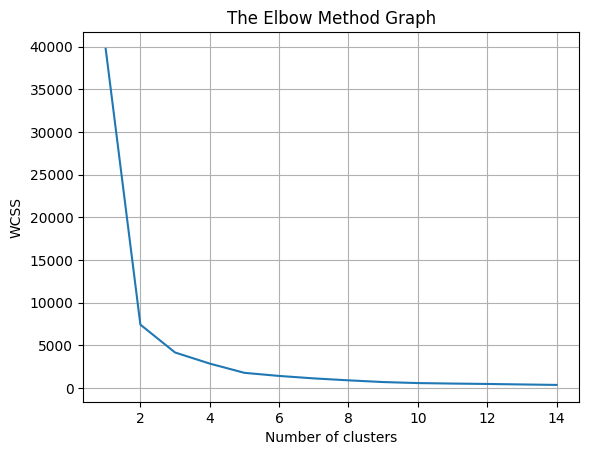

In [64]:
wcss = []
maxsize = 15
for cluster_size in range(1,maxsize):
    kmeans = KMeans(n_clusters=cluster_size, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,maxsize),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [65]:
optimal = 2
kmeans = KMeans(n_clusters=optimal, init='k-means++', max_iter=500, n_init=125, random_state=0)
y_kmeans = kmeans.fit_predict(X)
rdf['cluster']=y_kmeans

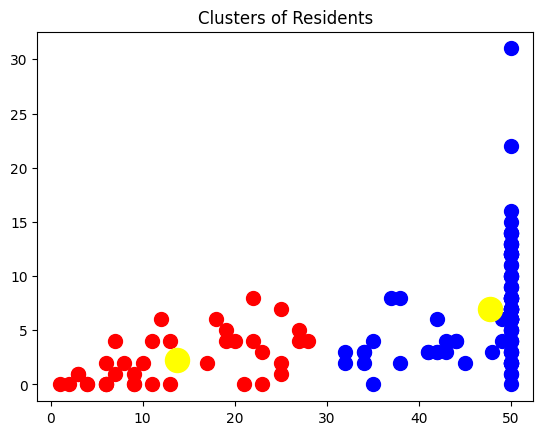

In [66]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Residents')
plt.show()

In [67]:
mapping = dict()
for name,x,y in zip(tdf.name,tdf.lat,tdf.lon):
    mapping[(x,y)]=name

In [68]:
import folium
this_map = folium.Map(prefer_canvas=True)
latlon = [(x,y,c) for x,y,c in zip(rdf['lat'],rdf['lon'],rdf['cluster'])]
coloring = {0:'red', 1:'blue', 2:'yellow'}
for coord in latlon:
    folium.CircleMarker(location=[coord[0], coord[1]],
                        radius=2,
                        weight=5,
                        color=coloring[coord[2]],
                        popup=mapping[(coord[0],coord[1])]).add_to(this_map)
this_map.fit_bounds(this_map.get_bounds())
this_map

Text(0.5, 1.0, 'Correlation between different fearures')

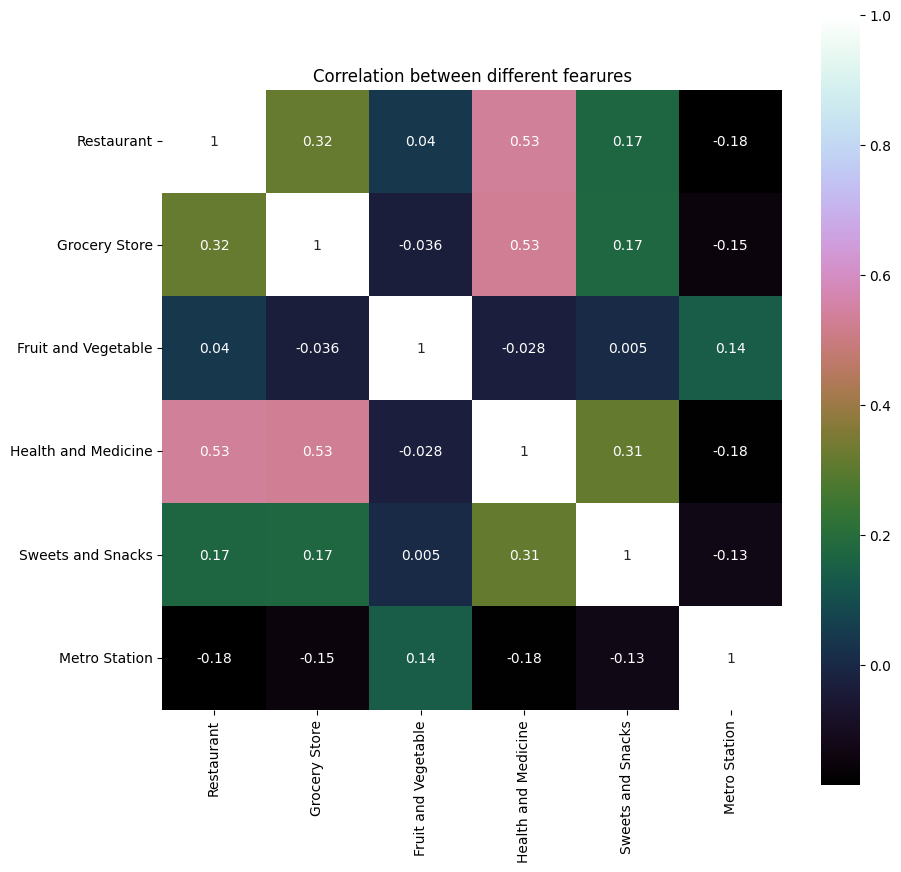

In [88]:
from sklearn.decomposition import PCA
features = ['Restaurant', 'Grocery Store','Fruit and Vegetable', 'Health and Medicine', 'Sweets and Snacks', 'Metro Station']
XC = rdf[features]
correlation = XC.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [90]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(XC)

In [91]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00735294  0.31922416  0.03985769  0.53801494  0.16904368 -0.18516257]
 [ 0.31922416  1.00735294 -0.03580622  0.53002509  0.17536548 -0.14827782]
 [ 0.03985769 -0.03580622  1.00735294 -0.02790659  0.00506915  0.14268275]
 [ 0.53801494  0.53002509 -0.02790659  1.00735294  0.31342641 -0.1790288 ]
 [ 0.16904368  0.17536548  0.00506915  0.31342641  1.00735294 -0.12748713]
 [-0.18516257 -0.14827782  0.14268275 -0.1790288  -0.12748713  1.00735294]]


In [92]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.49180718 -0.43923613 -0.15788697 -0.65867665  0.2361629  -0.22503595]
 [-0.48557544 -0.39746635 -0.05708677  0.67716593  0.30979716  0.22011387]
 [ 0.04387876  0.05180027 -0.81334831  0.23513952 -0.17477397 -0.49801544]
 [-0.58083866  0.78414235 -0.10647615 -0.06413293  0.12332741  0.13071863]
 [-0.33081913 -0.17143736 -0.04899734 -0.04681925 -0.8698257   0.31619362]
 [ 0.27129688 -0.04624776 -0.54455433 -0.21446609  0.21424395  0.7319997 ]]

Eigenvalues 
[2.17023815 0.37751626 1.10475825 0.66905043 0.88697901 0.83557555]


In [93]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.170238146877219
1.1047582511285268
0.8869790085058539
0.8355755488558526
0.6690504345575536
0.37751625713381814


In [94]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

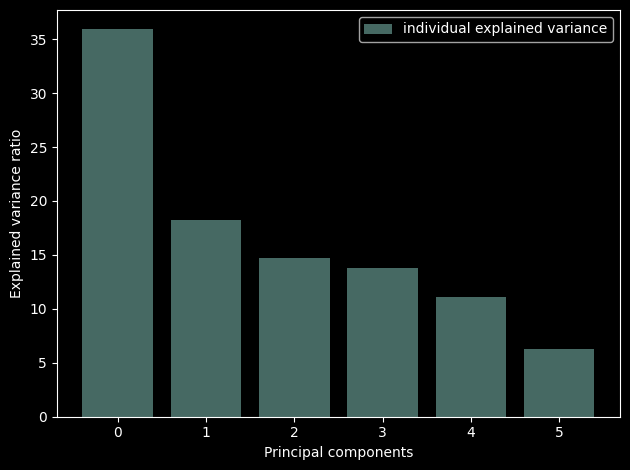

In [97]:
with plt.style.context('dark_background'):
    #plt.figure(figsize=(6, 4))

    plt.bar(range(6), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()